In [24]:
!pip install pandas
!pip install scikit-learn statsmodels
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import joblib

In [26]:
df = pd.read_csv("Walmart_Sales.csv")
print(df.head())
# print(df.dtypes)
df= df.select_dtypes(include=['number'])
print(df.dtypes)
# print(df.describe())
# print(df.corr())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


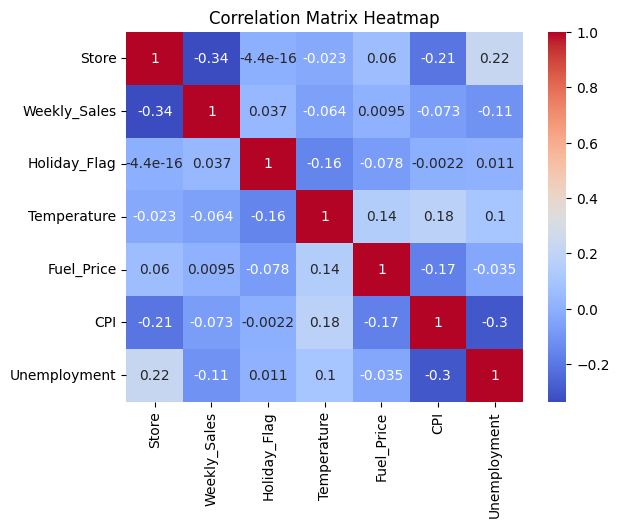

In [27]:
import seaborn as sns
#Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
X = df.drop(['Store','Weekly_Sales'], axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('regressor', SGDRegressor(max_iter=10000, learning_rate='adaptive', eta0=0.01))])


pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 SGDRegressor(learning_rate='adaptive', max_iter=10000))])

In [31]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('regressor', SGDRegressor(max_iter=10000, learning_rate='adaptive', eta0=0.01))])


pipeline.fit(X_train, y_train)

#Save model
joblib.dump(pipeline, 'sales_prediction_model.pkl')

# Coefficients
print("Coefficients:", pipeline.named_steps['regressor'].coef_)
print("Intercept:", pipeline.named_steps['regressor'].intercept_)

Coefficients: [ 21460.71559126  -9131.34396893  -9251.33382848 -64782.25883582
 -82271.3242939 ]
Intercept: [1045064.22141713]


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
# Ensure the same scikit-learn version is used
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")
try:
    loaded_pipeline = joblib.load('sales_prediction_model.pkl')
except KeyError:
    print("Error loading model. Regenerating and saving the model.")
    # Regenerate and save the model if loading fails
    pipeline.fit(X_train, y_train)
    joblib.dump(pipeline, 'sales_prediction_model.pkl')
    loaded_pipeline = joblib.load('sales_prediction_model.pkl')


y_pred = loaded_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Scikit-learn version: 1.6.1
Mean Squared Error: 316564561374.8565
R-squared: 0.017351929392129484
